<a id='Title-Feature-Extraction-And-Fine-Tuning'></a>
<h1 style="color:SlateGray;">Feature Extraction And Fine Tuning</h1>

**Input dataset**

Kaggle Cats and Dogs: a set of evenly split cat and dog images.

**Output classification**

Predict whether an image contains a cat or a dog.

<h2 style="color:SlateGray;">Background</h2>

**Pre-trained models**

[*VGG16*](08_Feature_Extraction.ipynb#Pre-trained-models-VGG16)

**Layers**

[*Dense*](01_Image_Classification.ipynb#Layers-Dense)

[*Dropout*](05_Overfitting_And_Underfitting.ipynb#Layers-Dropout)

**Activations**

[*relu*](01_Image_Classification.ipynb#Activations-relu)

[*sigmoid*](02_Binary_Classification.ipynb#Activations-sigmoid)
		
**Optimizers**

[*rmsprop*](01_Image_Classification.ipynb#Optimizers-rmsprop)
		
**Loss functions**

[*binary_crossentropy*](02_Binary_Classification.ipynb#Loss-functions-binary_crossentropy)

<h2 style="color:SlateGray;">Overview</h2>

Implementation of a feature extraction with data augmentation technique followed by a fine-tuning technique using a pre-trained convNet. Both techniques are computationally heavy due to the size of the model and varying usage, or lack thereof, layer freezing.

Instantiates a VGG16 convolutional base to be used as a “layer” in a sequential model followed by a Dense classifier. The feature extraction portion keeps all weights in all layers unfrozen leaving the model with adequately weighted values for this dataset. This is followed up by fine-tuning - freezing all but the top-most layer in the convolutional base and training the last remaining unfrozen block along with the classifier squeezing out just a bit more accuracy from the model.


In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.2'

In [2]:
import os

base_dir = r'./cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
from keras.applications import VGG16
from keras import models
from keras import layers

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/30
 - 34s - loss: 0.4754 - acc: 0.7655 - val_loss: 0.1940 - val_acc: 0.9190
Epoch 2/30
 - 29s - loss: 0.2961 - acc: 0.8675 - val_loss: 0.1439 - val_acc: 0.9400
Epoch 3/30
 - 29s - loss: 0.2146 - acc: 0.9105 - val_loss: 0.1564 - val_acc: 0.9300
Epoch 4/30
 - 29s - loss: 0.1688 - acc: 0.9275 - val_loss: 0.1862 - val_acc: 0.9300
Epoch 5/30
 - 29s - loss: 0.1767 - acc: 0.9220 - val_loss: 0.1036 - val_acc: 0.9650
Epoch 6/30
 - 29s - loss: 0.1292 - acc: 0.9470 - val_loss: 0.0937 - val_acc: 0.9650
Epoch 7/30
 - 29s - loss: 0.1171 - acc: 0.9525 - val_loss: 0.1174 - val_acc: 0.9590
Epoch 8/30
 - 29s - loss: 0.1038 - acc: 0.9585 - val_loss: 0.1888 - val_acc: 0.9480
Epoch 9/30
 - 29s - loss: 0.0904 - acc: 0.9680 - val_loss: 0.1155 - val_acc: 0.9550
Epoch 10/30
 - 29s - loss: 0.0775 - acc: 0.9700 - val_loss: 0.1165 - val_acc: 0.9670
Epoch 11/30
 - 29s - loss: 0.0830 - acc: 0.9685 - val_loss: 0.0980 - val_acc: 0.9610
Epoch 12/30
 - 29s - loss: 0.0689 - acc: 0.9750 - val_loss: 0.0703 - val_a

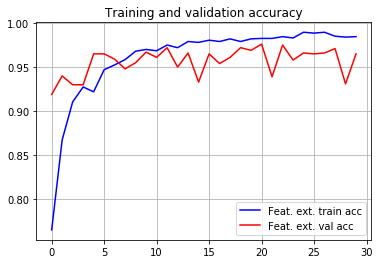

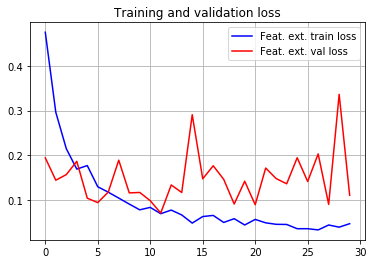

In [8]:
import matplotlib.pyplot as plt

fe_acc = history.history['acc']
fe_val_acc = history.history['val_acc']
fe_loss = history.history['loss']
fe_val_loss = history.history['val_loss']

epochs = range(len(fe_acc))

plt.plot(epochs, fe_acc, 'b', label='Feat. ext. train acc')
plt.plot(epochs, fe_val_acc, 'r', label='Feat. ext. val acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid()

plt.figure()

plt.plot(epochs, fe_loss, 'b', label='Feat. ext. train loss')
plt.plot(epochs, fe_val_loss, 'r', label='Feat. ext. val loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid()

plt.show()

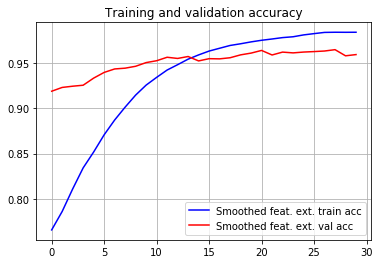

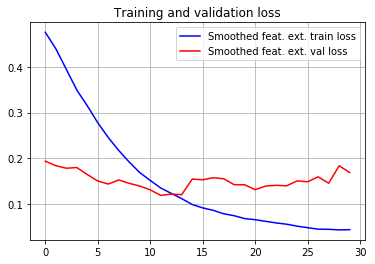

In [9]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs, smooth_curve(fe_acc), 'b', label='Smoothed feat. ext. train acc')
plt.plot(epochs, smooth_curve(fe_val_acc), 'r', label='Smoothed feat. ext. val acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid()

plt.figure()

plt.plot(epochs, smooth_curve(fe_loss), 'b', label='Smoothed feat. ext. train loss')
plt.plot(epochs, smooth_curve(fe_val_loss), 'r', label='Smoothed feat. ext. val loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid()

plt.show()

In [10]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

test acc: 0.9649999940395355


In [11]:
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [12]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/100
 - 19s - loss: 0.0210 - acc: 0.9925 - val_loss: 0.1221 - val_acc: 0.9720
Epoch 2/100
 - 17s - loss: 0.0125 - acc: 0.9950 - val_loss: 0.1076 - val_acc: 0.9730
Epoch 3/100
 - 17s - loss: 0.0088 - acc: 0.9965 - val_loss: 0.1233 - val_acc: 0.9680
Epoch 4/100
 - 17s - loss: 0.0112 - acc: 0.9965 - val_loss: 0.1329 - val_acc: 0.9770
Epoch 5/100
 - 17s - loss: 0.0053 - acc: 0.9975 - val_loss: 0.1140 - val_acc: 0.9720
Epoch 6/100
 - 16s - loss: 0.0119 - acc: 0.9960 - val_loss: 0.1185 - val_acc: 0.9750
Epoch 7/100
 - 16s - loss: 0.0121 - acc: 0.9960 - val_loss: 0.1330 - val_acc: 0.9760
Epoch 8/100
 - 19s - loss: 0.0129 - acc: 0.9945 - val_loss: 0.1410 - val_acc: 0.9680
Epoch 9/100
 - 20s - loss: 0.0052 - acc: 0.9985 - val_loss: 0.1243 - val_acc: 0.9720
Epoch 10/100
 - 18s - loss: 0.0072 - acc: 0.9980 - val_loss: 0.2336 - val_acc: 0.9660
Epoch 11/100
 - 19s - loss: 0.0055 - acc: 0.9975 - val_loss: 0.1256 - val_acc: 0.9710
Epoch 12/100
 - 19s - loss: 0.0092 - acc: 0.9975 - val_loss: 0.

Epoch 97/100
 - 21s - loss: 0.0087 - acc: 0.9985 - val_loss: 0.2587 - val_acc: 0.9740
Epoch 98/100
 - 20s - loss: 0.0018 - acc: 0.9990 - val_loss: 0.2094 - val_acc: 0.9770
Epoch 99/100
 - 20s - loss: 0.0056 - acc: 0.9980 - val_loss: 0.2202 - val_acc: 0.9770
Epoch 100/100
 - 21s - loss: 0.0046 - acc: 0.9985 - val_loss: 0.2070 - val_acc: 0.9730


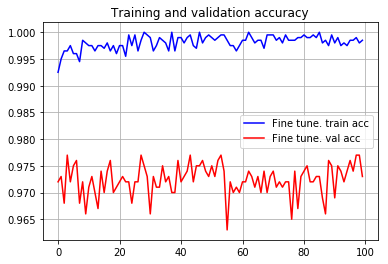

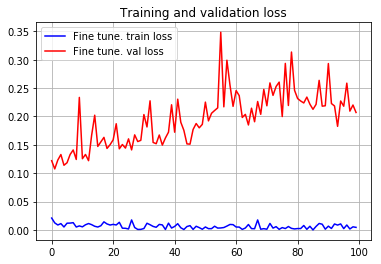

In [13]:
import matplotlib.pyplot as plt

ft_acc = history.history['acc']
ft_val_acc = history.history['val_acc']
ft_loss = history.history['loss']
ft_val_loss = history.history['val_loss']

epochs = range(len(ft_acc))

plt.plot(epochs, ft_acc, 'b', label='Fine tune. train acc')
plt.plot(epochs, ft_val_acc, 'r', label='Fine tune. val acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid()

plt.figure()

plt.plot(epochs, ft_loss, 'b', label='Fine tune. train loss')
plt.plot(epochs, ft_val_loss, 'r', label='Fine tune. val loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid()

plt.show()

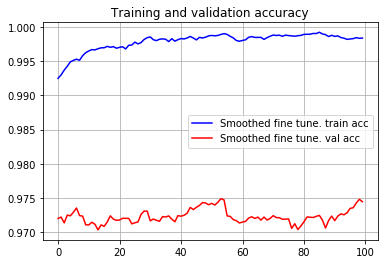

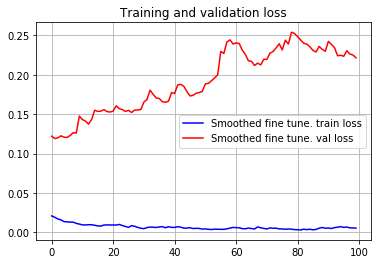

In [14]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs, smooth_curve(ft_acc), 'b', label='Smoothed fine tune. train acc')
plt.plot(epochs, smooth_curve(ft_val_acc), 'r', label='Smoothed fine tune. val acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid()

plt.figure()

plt.plot(epochs, smooth_curve(ft_loss), 'b', label='Smoothed fine tune. train loss')
plt.plot(epochs, smooth_curve(ft_val_loss), 'r', label='Smoothed fine tune. val loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid()

plt.show()

In [15]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

test acc: 0.9709999930858612
